In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import BaggingClassifier
import pandas as pd

# Load the dataset
file_path = r'C:\Users\MASUM\OneDrive\Desktop\Machine Learning\Accident\data.csv'  # Update to the correct path
data = pd.read_csv(file_path)

# Prepare features and target
X = data.drop(columns=['Cause of accident', 'Time of accident', 'Type of accident', 'Location of Accidents'])
y = data['Cause of accident']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Dictionary of classifiers
classifiers = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Support Vector Machine": SVC(probability=True, random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "Linear Discriminant Analysis": LinearDiscriminantAnalysis(),
    "Bagging Classifier": BaggingClassifier(random_state=42)
}

# Train and evaluate each classifier
results = {}
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy

# Sort and display results
sorted_results = dict(sorted(results.items(), key=lambda item: item[1], reverse=True))

# Print sorted results
print("Classifier Performance (sorted by accuracy):")
for clf_name, accuracy in sorted_results.items():
    print(f"{clf_name}: {accuracy:.4f}")


C:\Users\MASUM\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classifier Performance (sorted by accuracy):
Logistic Regression: 0.7727
Random Forest: 0.7727
Support Vector Machine: 0.7727
K-Nearest Neighbors: 0.7727
AdaBoost: 0.7727
Bagging Classifier: 0.7727
Decision Tree: 0.6818
Gradient Boosting: 0.6818
Linear Discriminant Analysis: 0.1818
Naive Bayes: 0.1364


C:\Users\MASUM\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [8]:
from pycaret.classification import *
import os
import matplotlib.pyplot as plt

# Load the dataset
file_path = r'C:\Users\MASUM\OneDrive\Desktop\Machine Learning\Accident\data.csv'  # Update to the correct path
data = pd.read_csv(file_path)

# Initialize PyCaret setup
clf_setup = setup(data, target='Cause of accident', session_id=42)

# Compare all models and choose the best one
best_model = compare_models()

# Directory to save plots
save_dir = r'C:\Users\MASUM\OneDrive\Desktop\Machine Learning\Saved_Plots'  # Update to the desired path
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

# Evaluate the best model (this generates multiple plots)
evaluate_model(best_model)

# Save all open plots (generated by PyCaret) as PNG files
for i, fig in enumerate(plt.get_fignums()):
    # Access the figure using the figure number
    fig = plt.figure(i)
    
    # Save each figure as PNG in the specified directory
    fig.savefig(os.path.join(save_dir, f'plot_{i+1}.png'), format='png')

# Finalize the model and save it (model will still be saved as .pkl)
final_model = finalize_model(best_model)
save_model(final_model, os.path.join(save_dir, 'best_accident_model.pkl'))

# If you want to make predictions using the best model:
predictions = predict_model(final_model, data)
print(predictions)


,Description,Value
0,Session id,42
1,Target,Cause of accident
2,Target type,Multiclass
3,Original data shape,"(72, 71)"
4,Transformed data shape,"(72, 84)"
5,Transformed train set shape,"(50, 84)"
6,Transformed test set shape,"(22, 84)"
7,Numeric features,6
8,Categorical features,3
9,Preprocess,True


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.7600,0.0950,0.7600,0.5840,0.6589,0.0000,0.0000,0.0580
et,Extra Trees Classifier,0.7600,0.1250,0.7600,0.6000,0.6678,0.0444,0.0500,0.0660
lightgbm,Light Gradient Boosting Machine,0.7600,0.1100,0.7600,0.5840,0.6589,0.0000,0.0000,0.0580
dummy,Dummy Classifier,0.7600,0.1000,0.7600,0.5840,0.6589,0.0000,0.0000,0.0240
lr,Logistic Regression,0.7200,0.0000,0.7200,0.5760,0.6367,-0.0500,-0.0500,0.4340
knn,K Neighbors Classifier,0.7000,0.0625,0.7000,0.5720,0.6256,-0.0611,-0.0625,0.0280
ridge,Ridge Classifier,0.7000,0.0000,0.7000,0.5720,0.6256,-0.0611,-0.0625,0.0240
lda,Linear Discriminant Analysis,0.6800,0.0000,0.6800,0.6470,0.6562,0.1028,0.1033,0.0260
svm,SVM - Linear Kernel,0.6200,0.0000,0.6200,0.4600,0.5233,0.0000,0.0000,0.0260
nb,Naive Bayes,0.5200,0.1100,0.5200,0.7267,0.5733,0.1487,0.2098,0.0260


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

Transformation Pipeline and Model Successfully Saved


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


   Time of accident    Type of accident  Death  Injury  \
0           9:00 AM   Head-on collision      1       1   
1           6:30 AM   Head-on collision      2       0   
2           5:45 AM  Rear-end collision      2       0   
3           1:40 PM  Rear-end collision      1       0   
4          12:00 PM  Rear-end collision      1       0   
..              ...                 ...    ...     ...   
67          7:40 AM  Rear-end collision      1       0   
68          9:00 AM         Overturning      1       0   
69          3:45 PM   Head on collision      1       0   
70          8:55 PM          Side swipe      0       3   
71         10:30 PM  Rear-end collision      3       0   

     Location of Accidents  Year  Month  Day  DayOfWeek  \
0           Santhia, Pabna  2023      3   21          1   
1   Vitapara,Santhia Pabna  2022     11   22          1   
2           Santhia, Pabna  2022      4    1          4   
3           Santhia, Pabna  2022      5   26          3   
4       

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier, RadiusNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, HistGradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import RidgeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.isotonic import IsotonicRegression
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Load the dataset
file_path = r'C:\Users\MASUM\OneDrive\Desktop\Machine Learning\Accident\data.csv'  # Update to the correct path
data = pd.read_csv(file_path)

# Prepare features and target
X = data.drop(columns=['Cause of accident', 'Time of accident', 'Type of accident', 'Location of Accidents'])
y = data['Cause of accident']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Dictionary of 20 classifiers
classifiers = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Support Vector Machine": SVC(probability=True, random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "Linear Discriminant Analysis": LinearDiscriminantAnalysis(),
    "Bagging Classifier": BaggingClassifier(random_state=42),
    "Extra Trees Classifier": ExtraTreesClassifier(random_state=42),
    "Radius Neighbors Classifier": RadiusNeighborsClassifier(radius=5.0),  # Increased radius significantly
    "Ridge Classifier": RidgeClassifier(),
    "Hist Gradient Boosting": HistGradientBoostingClassifier(random_state=42),
    "Perceptron": Perceptron(),
    "MLP Classifier": MLPClassifier(max_iter=1000),
    "Gaussian Process Classifier": GaussianProcessClassifier(),
    "Extra Tree Classifier": ExtraTreeClassifier(random_state=42),
    "Isotonic Regression": IsotonicRegression()
}

# Train and evaluate each classifier
results = {}
for name, clf in classifiers.items():
    try:
        clf.fit(X_train_scaled, y_train)
        y_pred = clf.predict(X_test_scaled)
        accuracy = accuracy_score(y_test, y_pred)
        results[name] = accuracy
    except Exception as e:
        results[name] = f"Error: {e}"

# Filter out classifiers with errors
valid_results = {name: accuracy for name, accuracy in results.items() if isinstance(accuracy, (int, float))}

# Sort and display top 20 results
sorted_results = dict(sorted(valid_results.items(), key=lambda item: item[1], reverse=True))

# Print top 20 sorted results
print("Top 20 Classifier Performance (sorted by accuracy):")
for i, (clf_name, accuracy) in enumerate(sorted_results.items()):
    if i < 20:
        print(f"{clf_name}: {accuracy:.4f}")


Top 20 Classifier Performance (sorted by accuracy):
Random Forest: 0.7727
Support Vector Machine: 0.7727
AdaBoost: 0.7727
Bagging Classifier: 0.7727
Hist Gradient Boosting: 0.7727
Logistic Regression: 0.6818
Decision Tree: 0.6818
K-Nearest Neighbors: 0.6818
Gradient Boosting: 0.6818
Extra Trees Classifier: 0.6818
Perceptron: 0.6818
Extra Tree Classifier: 0.6818
Ridge Classifier: 0.6364
Gaussian Process Classifier: 0.6364
MLP Classifier: 0.5455
Linear Discriminant Analysis: 0.1818
Naive Bayes: 0.1364


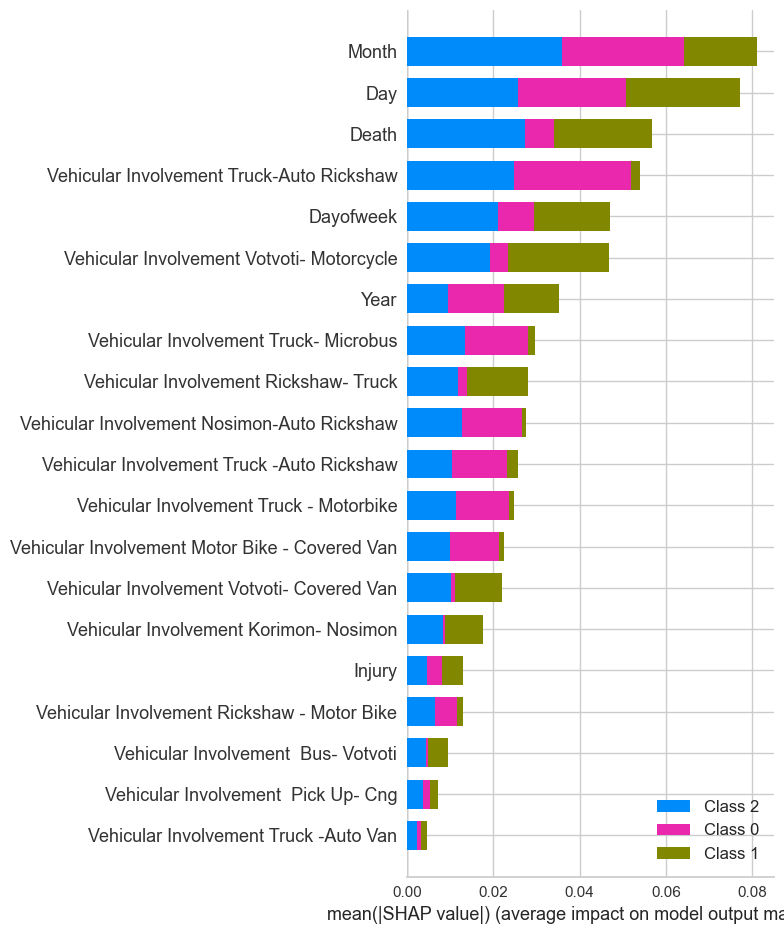

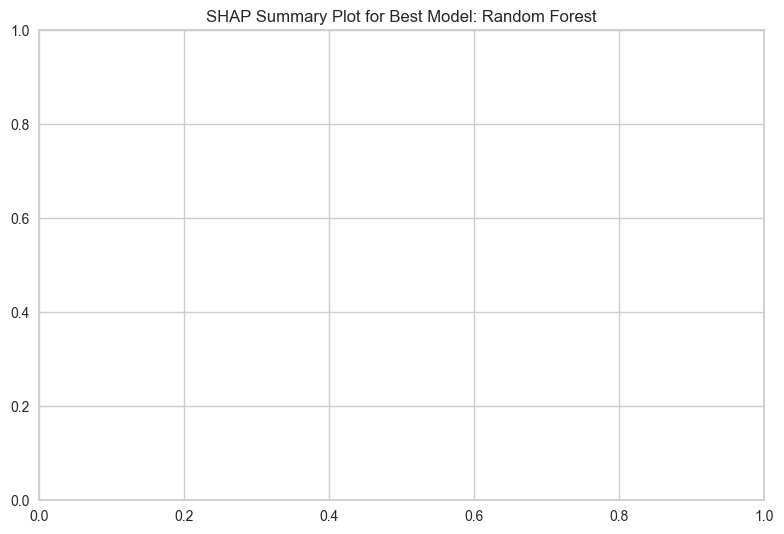

ValueError: Could not find feature named: Death

<Figure size 1200x800 with 0 Axes>

In [18]:
import shap
import pandas as pd
import os
import time
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, roc_auc_score, recall_score, precision_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier

# Load the dataset
file_path = r'C:\Users\MASUM\OneDrive\Desktop\Machine Learning\Accident\data.csv'  # Update to the correct path
data = pd.read_csv(file_path)

# Prepare features and target
X = data.drop(columns=['Cause of accident', 'Time of accident', 'Type of accident', 'Location of Accidents'])
y = data['Cause of accident']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define classifiers
classifiers = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Support Vector Machine": SVC(probability=True, random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "Linear Discriminant Analysis": LinearDiscriminantAnalysis(),
    "Bagging Classifier": BaggingClassifier(random_state=42)
}

# Store metrics and model results
metrics = []

# Train and evaluate each classifier
for name, clf in classifiers.items():
    try:
        start_time = time.time()  # Start time for training
        clf.fit(X_train_scaled, y_train)
        y_pred = clf.predict(X_test_scaled)
        
        # Compute performance metrics
        accuracy = accuracy_score(y_test, y_pred)
        auc = roc_auc_score(y_test, clf.predict_proba(X_test_scaled), multi_class='ovr', average='macro') if hasattr(clf, "predict_proba") else 0
        recall = recall_score(y_test, y_pred, average='macro')
        precision = precision_score(y_test, y_pred, average='macro')
        f1 = f1_score(y_test, y_pred, average='macro')
        end_time = time.time()  # End time for training
        tt = end_time - start_time  # Training time
        
        metrics.append([name, accuracy, auc, recall, precision, f1, tt])
        
    except Exception as e:
        print(f"Error with {name}: {e}")

# Convert metrics to a DataFrame
metrics_df = pd.DataFrame(metrics, columns=['Model', 'Accuracy', 'AUC', 'Recall', 'Precision', 'F1', 'TT (Sec)'])

# Sort the results by Accuracy to get the best model
best_model_name = metrics_df.sort_values(by='Accuracy', ascending=False).iloc[0]['Model']
best_model = classifiers[best_model_name]

# Train the best model
best_model.fit(X_train_scaled, y_train)

# Apply SHAP
explainer = shap.TreeExplainer(best_model)  # SHAP TreeExplainer is used for tree-based models
shap_values = explainer.shap_values(X_test_scaled)

# Modify feature names to split long names
modified_feature_names = [name.replace("_", " ").title() for name in X.columns]  # Example: split by underscore and capitalize

# Generate SHAP summary plot for the best model
plt.figure(figsize=(12, 8))
shap.summary_plot(shap_values, X_test_scaled, feature_names=modified_feature_names)
plt.title(f'SHAP Summary Plot for Best Model: {best_model_name}')
plt.tight_layout()  # Ensure everything fits without overlap
plt.savefig(f"saved_plots/shap_summary_{best_model_name}.png", dpi=300)  # Save the SHAP summary plot with high resolution
plt.show()

# Generate SHAP dependence plot for the best feature (you can choose a feature index or name)
best_feature = modified_feature_names[0]  # Example: selecting the first modified feature
plt.figure(figsize=(12, 8))
shap.dependence_plot(best_feature, shap_values[0], X_test_scaled, display_features=X_test_scaled)
plt.title(f'SHAP Dependence Plot for {best_feature} in {best_model_name}')
plt.tight_layout()  # Ensure everything fits without overlap
plt.savefig(f"saved_plots/shap_dependence_{best_model_name}_{best_feature}.png", dpi=300)  # Save the SHAP dependence plot with high resolution
plt.show()


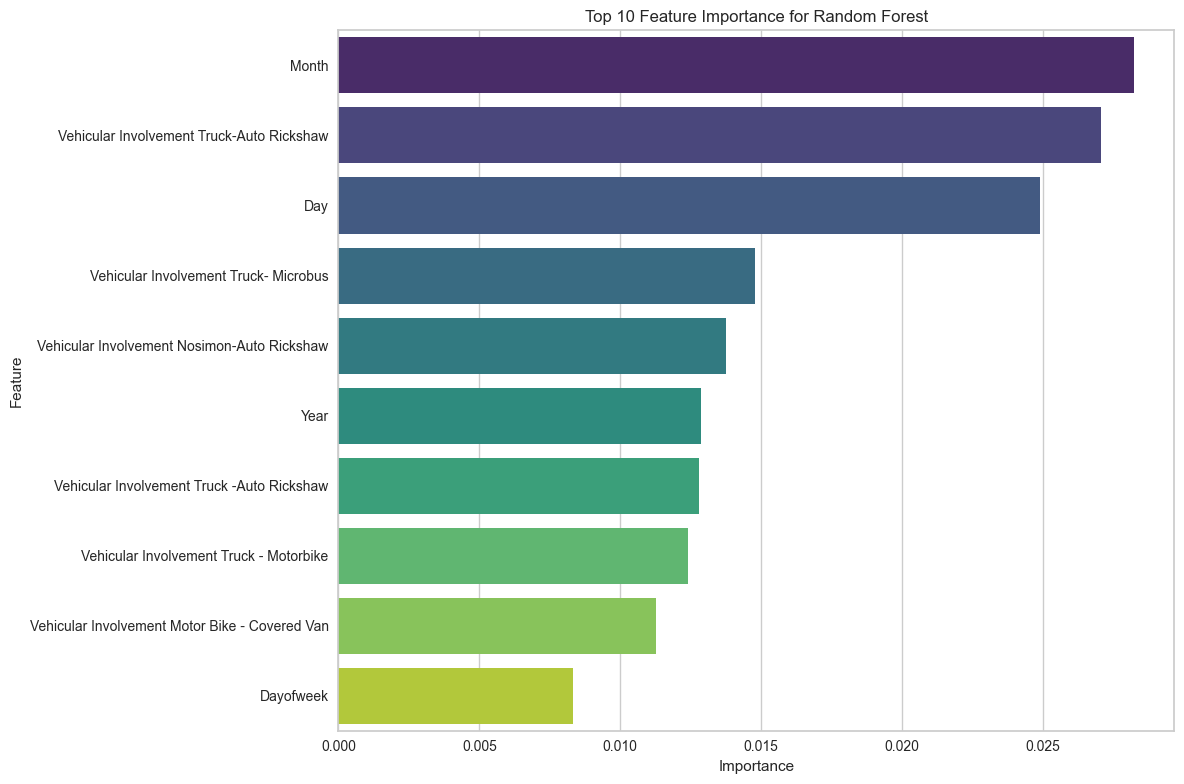

,Model,Accuracy,AUC,Recall,Precision,F1,TT (Sec)
0,Logistic Regression,0.681818,0.684340,0.294118,0.250000,0.270270,0.017480
1,Decision Tree,0.681818,0.463725,0.294118,0.250000,0.270270,0.014374
2,Random Forest,0.772727,0.469105,0.333333,0.257576,0.290598,0.152263
3,Support Vector Machine,0.772727,0.437195,0.333333,0.257576,0.290598,0.008001
4,K-Nearest Neighbors,0.681818,0.589835,0.294118,0.250000,0.270270,0.016001
5,Naive Bayes,0.136364,0.506656,0.333333,0.050000,0.086957,0.006923
6,Gradient Boosting,0.681818,0.647351,0.294118,0.250000,0.270270,0.248093
7,AdaBoost,0.772727,0.449265,0.333333,0.257576,0.290598,0.097688
8,Linear Discriminant Analysis,0.181818,0.442875,0.372549,0.261438,0.136842,0.009224
9,Bagging Classifier,0.772727,0.540798,0.333333,0.257576,0.290598,0.021000


In [24]:
import shap
import pandas as pd
import os
import time
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, roc_auc_score, recall_score, precision_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier

# Load the dataset
file_path = r'C:\Users\MASUM\OneDrive\Desktop\Machine Learning\Accident\data.csv'  # Update to the correct path
data = pd.read_csv(file_path)

# Prepare features and target
X = data.drop(columns=['Cause of accident', 'Time of accident', 'Type of accident', 'Location of Accidents'])
y = data['Cause of accident']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define classifiers
classifiers = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Support Vector Machine": SVC(probability=True, random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "Linear Discriminant Analysis": LinearDiscriminantAnalysis(),
    "Bagging Classifier": BaggingClassifier(random_state=42)
}

# Store metrics and model results
metrics = []

# Train and evaluate each classifier
for name, clf in classifiers.items():
    try:
        start_time = time.time()  # Start time for training
        clf.fit(X_train_scaled, y_train)
        y_pred = clf.predict(X_test_scaled)
        
        # Compute performance metrics
        accuracy = accuracy_score(y_test, y_pred)
        auc = roc_auc_score(y_test, clf.predict_proba(X_test_scaled), multi_class='ovr', average='macro') if hasattr(clf, "predict_proba") else 0
        recall = recall_score(y_test, y_pred, average='macro')
        precision = precision_score(y_test, y_pred, average='macro')
        f1 = f1_score(y_test, y_pred, average='macro')
        end_time = time.time()  # End time for training
        tt = end_time - start_time  # Training time
        
        metrics.append([name, accuracy, auc, recall, precision, f1, tt])
        
    except Exception as e:
        print(f"Error with {name}: {e}")

# Convert metrics to a DataFrame
metrics_df = pd.DataFrame(metrics, columns=['Model', 'Accuracy', 'AUC', 'Recall', 'Precision', 'F1', 'TT (Sec)'])

# Sort the results by Accuracy to get the best model
best_model_name = metrics_df.sort_values(by='Accuracy', ascending=False).iloc[0]['Model']
best_model = classifiers[best_model_name]

# Train the best model
best_model.fit(X_train_scaled, y_train)

# Apply SHAP
explainer = shap.TreeExplainer(best_model)  # SHAP TreeExplainer is used for tree-based models
shap_values = explainer.shap_values(X_test_scaled)

# Modify feature names to split long names
modified_feature_names = [name.replace("_", " ").title() for name in X.columns]  # Example: split by underscore and capitalize

# Get the SHAP feature importance
feature_importance = np.abs(shap_values[0]).mean(axis=0)

# Create a DataFrame with feature importance values
feature_importance_df = pd.DataFrame({
    'Feature': modified_feature_names,
    'Importance': feature_importance
})

# Sort the features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Select the top 10 features
top_10_features = feature_importance_df.head(10)

# Plot the top 10 features
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=top_10_features, palette='viridis')
plt.title(f'Top 10 Feature Importance for {best_model_name}')
plt.tight_layout()  # Ensure everything fits without overlap
plt.savefig(f"saved_plots/shap_top_10_features_{best_model_name}.png", dpi=300)  # Save the plot with high resolution
plt.show()

# Styling the accuracy table with a colorful format
def colorize(val):
    color = ''
    if isinstance(val, (int, float)):
        if val == metrics_df['Accuracy'].max():
            color = 'background-color: lightgreen'  # Highest accuracy: light green
        elif val >= metrics_df['Accuracy'].mean():
            color = 'background-color: lightyellow'  # Above average: light yellow
        else:
            color = 'background-color: lightcoral'  # Below average: light red
    return color

# Apply the colorization to the DataFrame
styled_df = metrics_df.style.applymap(colorize, subset=['Accuracy'])

# Display the styled DataFrame
styled_df


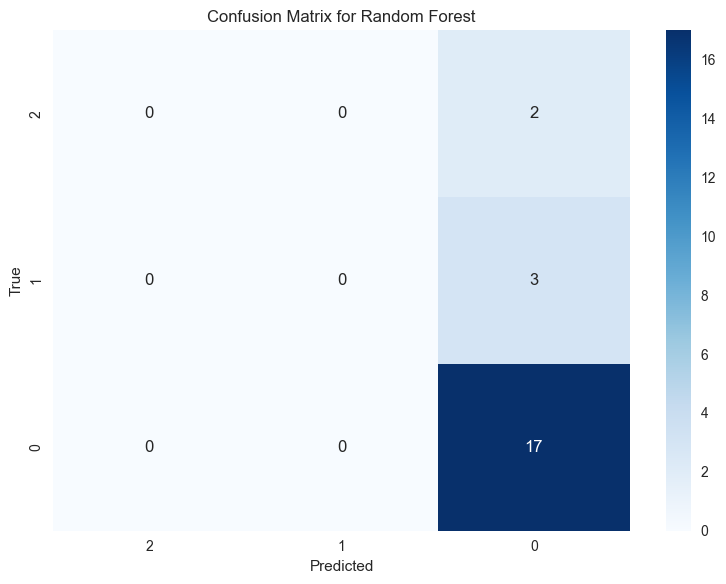

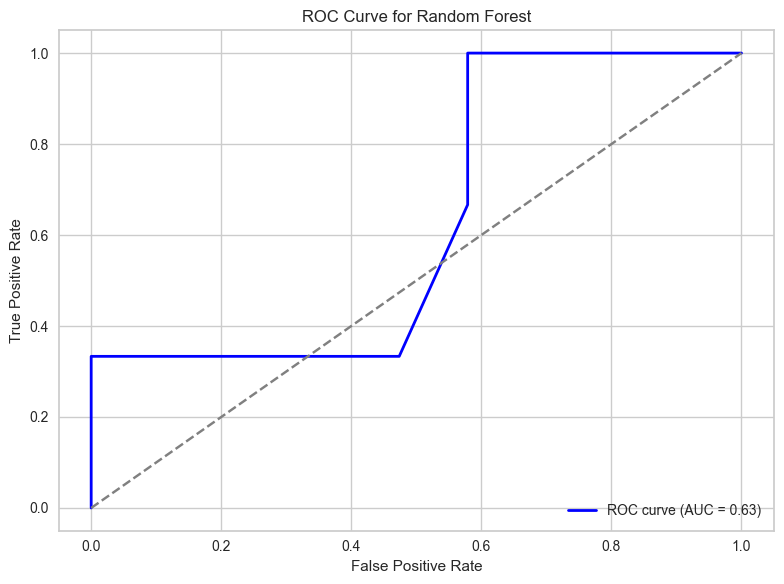

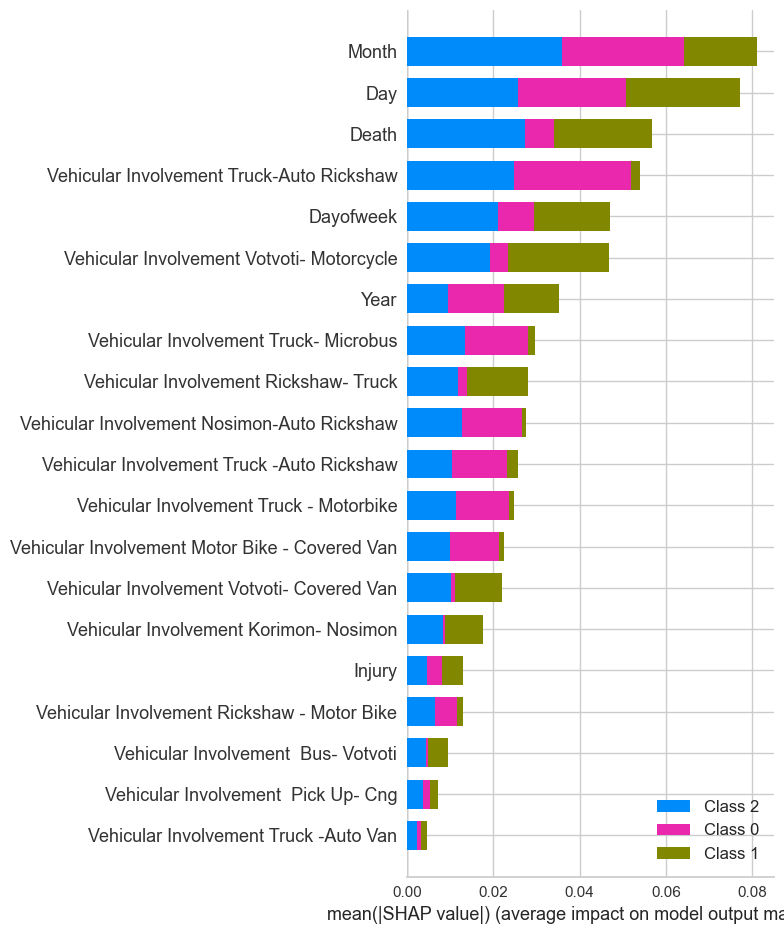

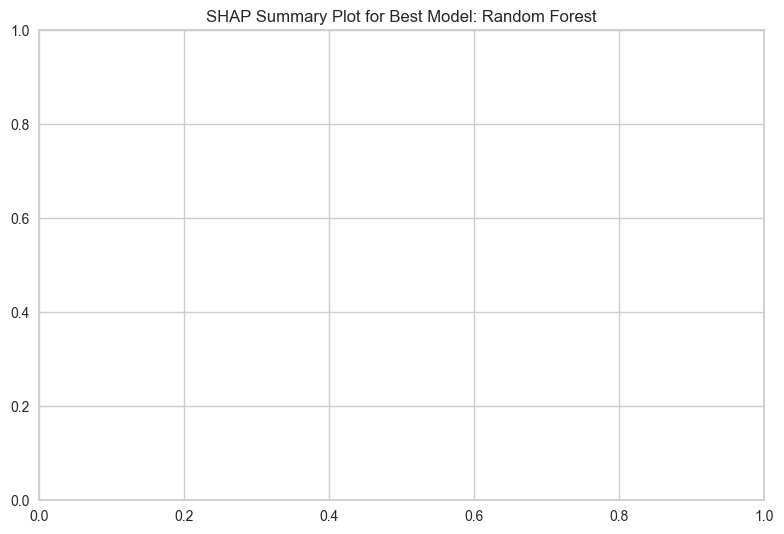

ValueError: Could not find feature named: Death

<Figure size 1200x800 with 0 Axes>

In [20]:
import shap
import pandas as pd
import os
import time
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, roc_auc_score, recall_score, precision_score, f1_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.metrics import roc_curve, auc

# Load the dataset
file_path = r'C:\Users\MASUM\OneDrive\Desktop\Machine Learning\Accident\data.csv'  # Update to the correct path
data = pd.read_csv(file_path)

# Prepare features and target
X = data.drop(columns=['Cause of accident', 'Time of accident', 'Type of accident', 'Location of Accidents'])
y = data['Cause of accident']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define classifiers
classifiers = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Support Vector Machine": SVC(probability=True, random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "Linear Discriminant Analysis": LinearDiscriminantAnalysis(),
    "Bagging Classifier": BaggingClassifier(random_state=42)
}

# Store metrics and model results
metrics = []

# Train and evaluate each classifier
for name, clf in classifiers.items():
    try:
        start_time = time.time()  # Start time for training
        clf.fit(X_train_scaled, y_train)
        y_pred = clf.predict(X_test_scaled)
        
        # Compute performance metrics
        accuracy = accuracy_score(y_test, y_pred)
        auc_score = roc_auc_score(y_test, clf.predict_proba(X_test_scaled), multi_class='ovr', average='macro') if hasattr(clf, "predict_proba") else 0
        recall = recall_score(y_test, y_pred, average='macro')
        precision = precision_score(y_test, y_pred, average='macro')
        f1 = f1_score(y_test, y_pred, average='macro')
        end_time = time.time()  # End time for training
        tt = end_time - start_time  # Training time
        
        metrics.append([name, accuracy, auc_score, recall, precision, f1, tt])
        
    except Exception as e:
        print(f"Error with {name}: {e}")

# Convert metrics to a DataFrame
metrics_df = pd.DataFrame(metrics, columns=['Model', 'Accuracy', 'AUC', 'Recall', 'Precision', 'F1', 'TT (Sec)'])

# Sort the results by Accuracy to get the best model
best_model_name = metrics_df.sort_values(by='Accuracy', ascending=False).iloc[0]['Model']
best_model = classifiers[best_model_name]

# Train the best model
best_model.fit(X_train_scaled, y_train)

# Apply SHAP
explainer = shap.TreeExplainer(best_model)  # SHAP TreeExplainer is used for tree-based models
shap_values = explainer.shap_values(X_test_scaled)

# Modify feature names to split long names
modified_feature_names = [name.replace("_", " ").title() for name in X.columns]  # Example: split by underscore and capitalize

# --------------------- 1. Confusion Matrix -------------------------
conf_matrix = confusion_matrix(y_test, best_model.predict(X_test_scaled))
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=y.unique(), yticklabels=y.unique())
plt.title(f'Confusion Matrix for {best_model_name}')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.tight_layout()
plt.savefig(f"saved_plots/conf_matrix_{best_model_name}.png", dpi=300)
plt.show()

# --------------------- 2. ROC Curve -------------------------
fpr, tpr, _ = roc_curve(y_test, best_model.predict_proba(X_test_scaled)[:, 1], pos_label=1)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title(f'ROC Curve for {best_model_name}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.tight_layout()
plt.savefig(f"saved_plots/roc_curve_{best_model_name}.png", dpi=300)
plt.show()

# --------------------- 3. SHAP Summary Plot -------------------------
plt.figure(figsize=(12, 8))
shap.summary_plot(shap_values, X_test_scaled, feature_names=modified_feature_names)
plt.title(f'SHAP Summary Plot for Best Model: {best_model_name}')
plt.tight_layout()
plt.savefig(f"saved_plots/shap_summary_{best_model_name}.png", dpi=300)
plt.show()

# --------------------- 4. SHAP Dependence Plot -------------------------
best_feature = modified_feature_names[0]  # Select the top feature
plt.figure(figsize=(12, 8))
shap.dependence_plot(best_feature, shap_values[0], X_test_scaled, display_features=X_test_scaled)
plt.title(f'SHAP Dependence Plot for {best_feature} in {best_model_name}')
plt.tight_layout()
plt.savefig(f"saved_plots/shap_dependence_{best_model_name}_{best_feature}.png", dpi=300)
plt.show()

# --------------------- 5. Feature Importance Plot -------------------------
feature_importance = np.abs(shap_values[0]).mean(axis=0)
feature_importance_df = pd.DataFrame({
    'Feature': modified_feature_names,
    'Importance': feature_importance
})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
top_10_features = feature_importance_df.head(10)

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=top_10_features, palette='viridis')
plt.title(f'Top 10 Feature Importance for {best_model_name}')
plt.tight_layout()
plt.savefig(f"saved_plots/shap_top_10_features_{best_model_name}.png", dpi=300)
plt.show()

# --------------------- 6. SHAP Force Plot -------------------------
shap.initjs()
shap.force_plot(explainer.expected_value[0], shap_values[0][0], X_test_scaled[0], feature_names=modified_feature_names)
plt.title(f'SHAP Force Plot for {best_model_name} - Sample 1')
plt.tight_layout()
plt.savefig(f"saved_plots/shap_force_plot_{best_model_name}_sample_1.png", dpi=300)
plt.show()


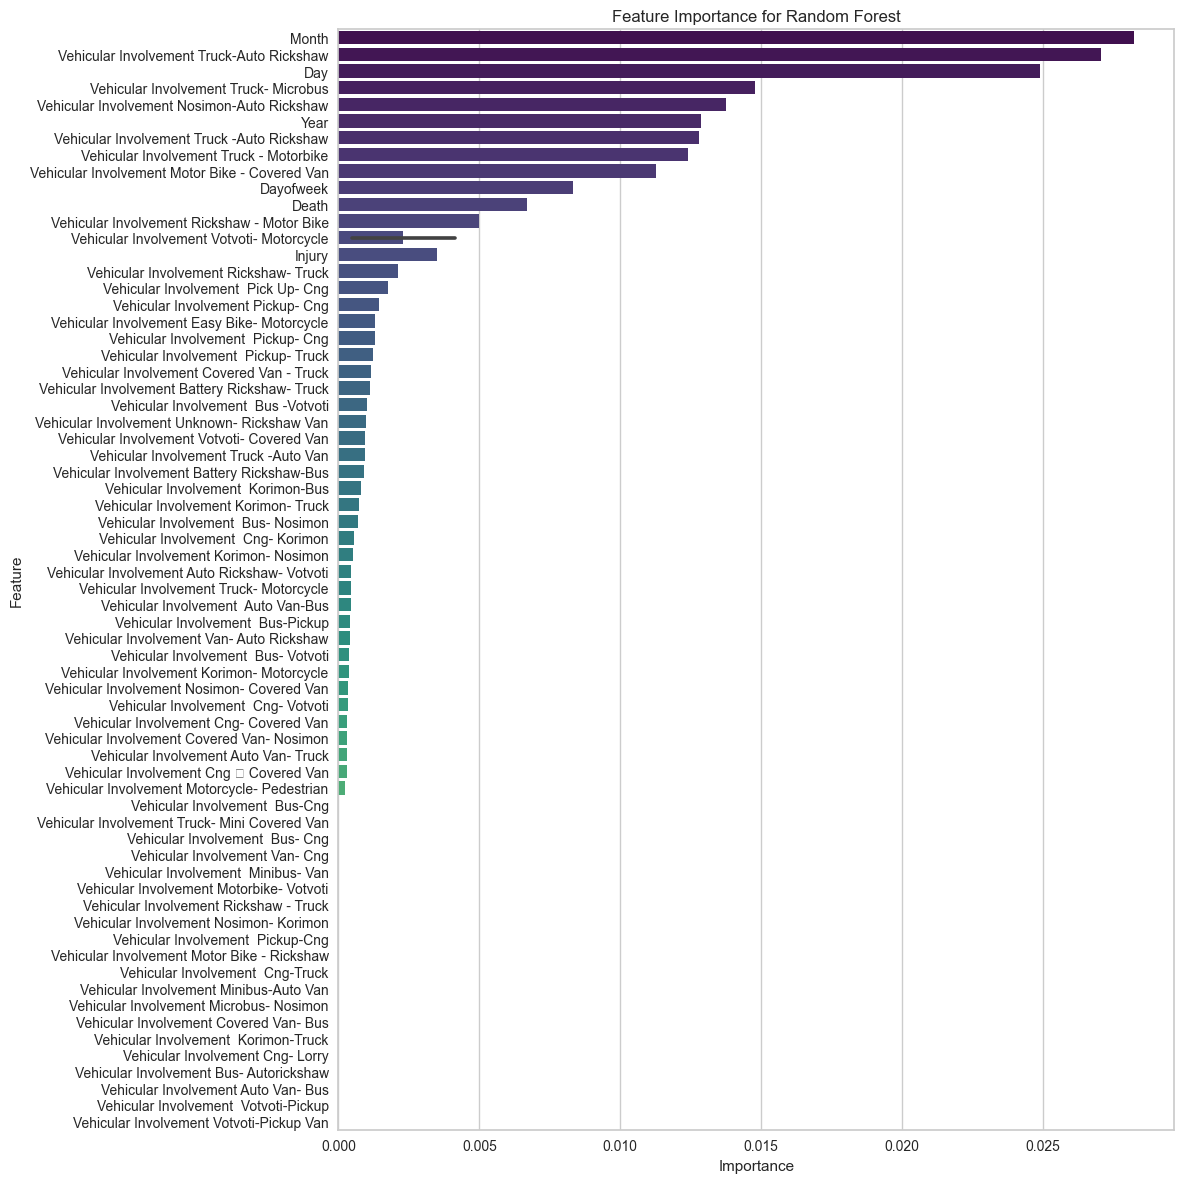

,Model,Accuracy,AUC,Recall,Precision,F1,TT (Sec)
0,Logistic Regression,0.681818,0.684340,0.294118,0.250000,0.270270,0.017632
1,Decision Tree,0.681818,0.463725,0.294118,0.250000,0.270270,0.007160
2,Random Forest,0.772727,0.469105,0.333333,0.257576,0.290598,0.103718
3,Support Vector Machine,0.772727,0.437195,0.333333,0.257576,0.290598,0.009000
4,K-Nearest Neighbors,0.681818,0.589835,0.294118,0.250000,0.270270,0.015000
5,Naive Bayes,0.136364,0.506656,0.333333,0.050000,0.086957,0.006000
6,Gradient Boosting,0.681818,0.647351,0.294118,0.250000,0.270270,0.164000
7,AdaBoost,0.772727,0.449265,0.333333,0.257576,0.290598,0.074081
8,Linear Discriminant Analysis,0.181818,0.442875,0.372549,0.261438,0.136842,0.017101
9,Bagging Classifier,0.772727,0.540798,0.333333,0.257576,0.290598,0.049879


In [26]:
import shap
import pandas as pd
import os
import time
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, roc_auc_score, recall_score, precision_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier

# Load the dataset
file_path = r'C:\Users\MASUM\OneDrive\Desktop\Machine Learning\Accident\data.csv'  # Update to the correct path
data = pd.read_csv(file_path)

# Prepare features and target
X = data.drop(columns=['Cause of accident', 'Time of accident', 'Type of accident', 'Location of Accidents'])
y = data['Cause of accident']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define classifiers
classifiers = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Support Vector Machine": SVC(probability=True, random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "Linear Discriminant Analysis": LinearDiscriminantAnalysis(),
    "Bagging Classifier": BaggingClassifier(random_state=42)
}

# Store metrics and model results
metrics = []

# Train and evaluate each classifier
for name, clf in classifiers.items():
    try:
        start_time = time.time()  # Start time for training
        clf.fit(X_train_scaled, y_train)
        y_pred = clf.predict(X_test_scaled)
        
        # Compute performance metrics
        accuracy = accuracy_score(y_test, y_pred)
        auc = roc_auc_score(y_test, clf.predict_proba(X_test_scaled), multi_class='ovr', average='macro') if hasattr(clf, "predict_proba") else 0
        recall = recall_score(y_test, y_pred, average='macro')
        precision = precision_score(y_test, y_pred, average='macro')
        f1 = f1_score(y_test, y_pred, average='macro')
        end_time = time.time()  # End time for training
        tt = end_time - start_time  # Training time
        
        metrics.append([name, accuracy, auc, recall, precision, f1, tt])
        
    except Exception as e:
        print(f"Error with {name}: {e}")

# Convert metrics to a DataFrame
metrics_df = pd.DataFrame(metrics, columns=['Model', 'Accuracy', 'AUC', 'Recall', 'Precision', 'F1', 'TT (Sec)'])

# Sort the results by Accuracy to get the best model
best_model_name = metrics_df.sort_values(by='Accuracy', ascending=False).iloc[0]['Model']
best_model = classifiers[best_model_name]

# Train the best model
best_model.fit(X_train_scaled, y_train)

# Apply SHAP
explainer = shap.TreeExplainer(best_model)  # SHAP TreeExplainer is used for tree-based models
shap_values = explainer.shap_values(X_test_scaled)

# Modify feature names to split long names
modified_feature_names = [name.replace("_", " ").title() for name in X.columns]  # Example: split by underscore and capitalize

# Get the SHAP feature importance
feature_importance = np.abs(shap_values[0]).mean(axis=0)

# Create a DataFrame with feature importance values
feature_importance_df = pd.DataFrame({
    'Feature': modified_feature_names,
    'Importance': feature_importance
})

# Sort the features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot all features
plt.figure(figsize=(12, 12))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title(f'Feature Importance for {best_model_name}')
plt.tight_layout()  # Ensure everything fits without overlap
plt.savefig(f"saved_plots/shap_all_features_{best_model_name}.png", dpi=300)  # Save the plot with high resolution
plt.show()

# Display metrics table with accuracy
metrics_df
